# Analysis of TMDB

## Introduction
> In this notebook we will be cleaning and anaylising the TMDB dataset which is dataset of around 10,000 movies. The questions that I am looking to answer are money related and time of year related. The first question is the correlation between how much money is spent making a movie vs the net profit of that movie. My second question is their a best time to release a movie from a profit standpoint. 

# Data Wrangling
### General Properties

In [116]:
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd
df=pd.read_csv('tmdb-movies.csv')

In [117]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [118]:
#checking to see if they are any missing varibles that not in the rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [119]:
# checking to how many unique variables they are
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [120]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Cleaning data

In [121]:
#drop columns with the most missing data
df=df.drop(['homepage','overview','keywords','tagline'] ,axis='columns')

In [122]:
#checking to make sure it dropped the columns 
df.shape

(10866, 17)

In [123]:
#drop the row with null vaule
df.dropna(inplace=True)

In [124]:
#checking to see if it dropped the missing rows 
df.shape

(9771, 17)

In [125]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9771.000000,9771.000000,9.771000e+03,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9.771000e+03,9.771000e+03
mean,63188.435165,0.694765,1.618439e+07,4.423583e+07,102.938491,239.339986,5.963289,2000.877699,1.942105e+07,5.705903e+07
std,90720.809530,1.036975,3.221186e+07,1.225943e+08,27.864293,603.036904,0.913213,13.037270,3.566724e+07,1.514565e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10221.000000,0.232665,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18681.000000,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.245007e+05,0.000000e+00
75%,70506.500000,0.776436,1.945000e+07,3.105254e+07,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.312352e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


### If you look at the budget and revenue you can see that  min through 25% = 0. So this means further data cleaning than dropping the null value

In [126]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [127]:
# this should get rid of all the movies that didn't have a budget included in the data
df=df[df.budget_adj !=0]

In [128]:
#this get rid of all the rows that had 0 entered for the revenue
df=df[df.revenue_adj !=0]

In [129]:
#the final shape of the dataset after cleaning 
df.shape

(3806, 17)

# EDA
## Question 1.)
### Do films that spend more on a movie see a bigger return on invesment

In [130]:
# to help answer this question we are going to want to know the net profit
df['profit']= df['revenue_adj']-df['budget_adj']

I am going to chart profit to find the distribtion on how much money a movie makes

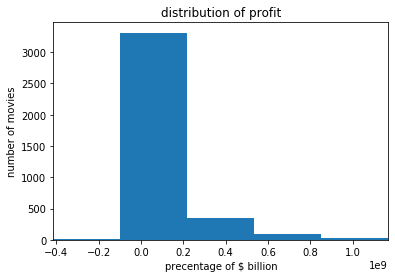

In [131]:
# lets perform analysis to of profit so we understand the spread
plt.hist(x =df['profit'])
plt.xlim([-4.13912431e+08,1.16811211e+09])
plt.title('distribution of profit')
plt.xlabel('precentage of $ billion')
plt.ylabel('number of movies');

From the histogram we can tell that only a very few movies have over 200 million in profit and majority of movies have a range of a net loss of 1.4 million to a net profit 100 million. Which would all fall under the big column in the histogram above.

Finding the distribution for how much money a movie typically spends on movie.

Text(0.5, 1.0, 'distribution of budgets')

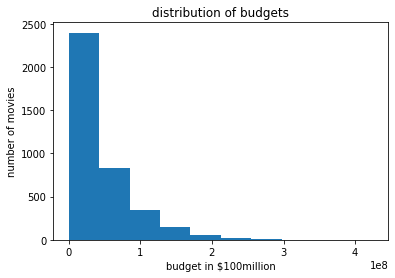

In [132]:
# lets see the disrtibution for the budget.
plt.hist(x =df['budget_adj']);
plt.xlabel('budget in $100million')
plt.ylabel('number of movies')
plt.title('distribution of budgets')

In [133]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3806.000000,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000,3806.000000,3.806000e+03,3.806000e+03,3.806000e+03
mean,40040.938518,1.203625,3.760600e+07,1.089450e+08,109.346558,534.047556,6.170257,2001.231477,4.471590e+07,1.386797e+08,9.396384e+07
std,67576.835878,1.480407,4.231641e+07,1.772829e+08,19.845063,883.668197,0.792560,11.329019,4.488171e+07,2.169803e+08,1.950178e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,5932.500000,0.470673,1.000000e+07,1.429262e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.923514e+07,-1.422082e+06
50%,11255.000000,0.810226,2.500000e+07,4.620904e+07,106.000000,208.500000,6.200000,2004.000000,3.038360e+07,6.283467e+07,2.850206e+07
75%,38703.500000,1.387058,5.000000e+07,1.260625e+08,119.000000,584.000000,6.700000,2010.000000,6.083489e+07,1.657273e+08,1.090042e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


#### From the describe section of the datagrame once all the data has been cleaned to contain movies that both had a budget and revenue greater than zero. We can see that mean from the revune is greater than mean from the budget. The mean for profit of all the movies is 90 million

In [134]:
x=df['budget_adj']
y=df['profit']

Text(0.5, 1.0, 'correlation between profit and budget')

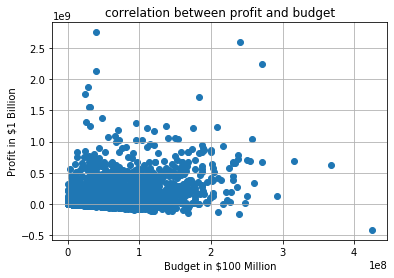

In [135]:
# making a scatter plot we are try to see if their is a correlation between budget and profit
plt.scatter(x,y)
plt.xlabel('Budget in $100 Million')
plt.ylabel('Profit in $1 Billion')
plt.grid(True)
plt.title('correlation between profit and budget')

### From the scatter plot above their seems no clear corelation that having a bigger budget means that you are going to have a greater profit.

## Question 2.)
### Does the month that the movie is released have an impact on profit

In [136]:
#Changed the release date column to a readable datetime.
from datetime import timedelta, date
df['release_date'+'_new'] = pd.to_datetime(df['release_date'])
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_date_new
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,5.374412e+07,2066-12-20
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,4.625353e+07,2066-08-24


In [137]:
#some of the years in the 1960 release date are in the wrong century
future = df['release_date'+'_new'] > pd.to_datetime(date(year=2020,month=1,day=1))
#so i substracted 100 years to get the right year
df.loc[future,'release_date' +'_new']-= timedelta(days=365.25*100)
df['release_date'+'_new'].tail()

10822   1966-06-21
10828   1966-07-13
10829   1966-12-17
10835   1966-12-20
10848   1966-08-24
Name: release_date_new, dtype: datetime64[ns]

Lets find out which months are the most profitable. to do this lets first create a new column.

In [138]:
# created a new column for the month that movie was released
df['release_month']=df['release_date_new'].dt.month

In [139]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_date_new,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,2015-06-09,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,2015-05-13,5


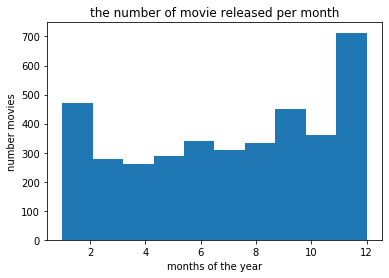

In [145]:
#let's look into how many mvoies are released into each month 
plt.hist(x=df['release_month'])
plt.title('the number of movie released per month')
plt.ylabel('number movies')
plt.xlabel('months of the year');

In [141]:
#Grouped the months of the year that movies were realesed 
JR= df.query('release_month==1').profit.mean()
FR= df.query('release_month==2').profit.mean()
MR= df.query('release_month== 3').profit.mean()
AR = df.query('release_month == 4').profit.mean()
MR_2 = df.query('release_month == 5').profit.mean()
JR = df.query('release_month == 6').profit.mean()
JR_2= df.query('release_month ==7').profit.mean()
AR_2 = df.query('release_month==8').profit.mean()
SR = df.query('release_month == 9').profit.mean()
OR =df.query('release_month == 10').profit.mean()
NR=df.query('release_month == 11').profit.mean()
DR=df.query('release_month == 12').profit.mean()

Text(0.5, 0, 'Months of the year')

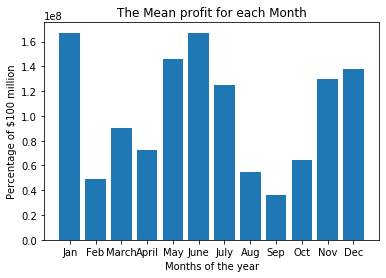

In [142]:
#Using the grouping of the months to see which month was more profitable 
plt.bar(["Jan","Feb","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"],[JR, FR,MR,AR,MR_2,JR, JR_2,AR_2,SR,OR,NR,DR])
plt.title("The Mean profit for each Month")
plt.ylabel('Percentage of $100 million')
plt.xlabel('Months of the year')

# Conclusions 
## Observations from chart
>1.)The most profitable movies are during the Winter and in the Summer. 
2.)The mean profit are the lowest for the Spring and in the Fall.
3.) With Janurary and June having the highest average profit for movies in the dataset.
### Overall you can't expect that your movie will be more profitable because you had a more expesive budget. Although you can expect your movie to make more if it is released in January compared to september. Why this would be might have to do more with the weather as September is a pretty enjoyable time of the year to be outside althought that doesn't explain why February is much lower. The reason that I suspect that  Feburary is lower than the rest of the months is that the majority of films seem to romanced themed due to Valinetines day.

### Limitations: 
>the limatation that I noticed with data set was that for the budget and revenue movies, over half of it was missing so it would be hard to know if the visualisations are accurate. Also another limitation is that all the currency data is expressed in scientific notation so it can be sort hard to tell what that charts actual mean. Another limition that I was able to fix was having the date time create future dates, which created error in my code that I had to work out.